# Redes Neurais: Problemas de Regressão

Autor:
- Arthur Vinicius Santos Silva
- Lucas da Silva Santos

## Lendo as bibliotecas

In [87]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
pd.set_option('display.max_columns', 25)

In [89]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

## Base de Dados


In [90]:
#from google.colab import drive
#drive.mount('/content/drive')

In [91]:
#df_treino_teste = pd.read_csv('/content/drive/MyDrive/os crias/8 Semestre/Data Science/AC2/base-dados/05_df_treino_teste.csv')
#df_treino_teste.tail()

df_treino_teste = pd.read_csv(
    './base-dados/05_df_treino_teste.csv')
df_treino_teste.tail()


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4995,P07626,KK Nagar,1733,17-09-2008,148,2.0,1.0,4,AbNormal,No,21-09-1993,Commercial,NoSeWa,Gravel,RL,2.9,4.5,4.9,4.180,709109,132958,14773100
4996,P04588,Karapakkam,1459,04-08-2010,35,2.0,2.0,4,Partial,Yes,06-08-2002,House,AllPub,Gravel,RH,2.0,3.0,4.4,3.260,333648,207403,9017500
4997,P00161,Anna Nagar,1854,02-11-2014,120,2.0,1.0,5,Normal Sale,Yes,07-11-1993,Others,ELO,No Access,RL,2.3,3.3,2.8,2.750,404223,236959,13938740
4998,P08529,Anna Nagar,1617,20-11-2007,58,1.0,1.0,4,AdjLand,Yes,21-11-2001,House,ELO,Gravel,RM,3.9,4.4,3.0,3.665,367007,211735,14115670
4999,P05833,Karapakkam,725,13-12-2009,147,1.0,1.0,2,AdjLand,Yes,21-12-1976,House,ELO,Paved,C,2.0,3.7,2.4,2.670,178317,49533,4953250


In [92]:
df_treino_teste.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [93]:
#df_treino_teste = df_treino_teste.drop(columns = ['PRT_ID'])

In [94]:
# df_validacao = pd.read_csv('/content/drive/MyDrive/os crias/8 Semestre/Data Science/AC2/base-dados/05_validacao.csv',sep=';')
# df_validacao.tail()

df_validacao = pd.read_csv(
    './base-dados/05_validacao.csv', sep=';')
df_validacao.tail()


,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
2104,P09034,Anna Nagar,1838,31,2.0,1.0,5,AdjLand,Yes,16/05/1971,Commercial,ELO,No Access,RH,2.7,3.7,3.2,3.15
2105,P02617,Chrompet,1191,189,1.0,1.0,3,Partial,Yes,07/09/1988,House,ELO,Gravel,RL,4.1,2.9,3.7,3.50
2106,P03449,KK Nagar,2317,37,4.0,2.0,6,AbNormal,No,31/03/1983,House,NoSewr,Paved,RH,5.0,4.6,2.2,3.76
2107,P06766,KK Nagar,2344,181,4.0,2.0,6,Normal Sale,No,04/06/1992,Commercial,NoSeWa,Gravel,RM,3.8,2.4,4.6,3.70
2108,P05763,Karapakkam,1008,194,1.0,1.0,3,Partial,Yes,03/01/1979,Commercial,NoSeWa,No Access,RL,2.5,4.5,3.4,3.46


## Tratamento de Dados

### Dividindo a base entre treino, teste e validação

### Verificar valores ausentes nos datasets

In [95]:
missing_values_treino_teste = df_treino_teste.isnull().sum()
missing_values_validacao = df_validacao.isnull().sum()

missing_values_treino_teste, missing_values_validacao

(PRT_ID            0
 AREA              0
 INT_SQFT          0
 DATE_SALE         0
 DIST_MAINROAD     0
 N_BEDROOM         0
 N_BATHROOM        4
 N_ROOM            0
 SALE_COND         0
 PARK_FACIL        0
 DATE_BUILD        0
 BUILDTYPE         0
 UTILITY_AVAIL     0
 STREET            0
 MZZONE            0
 QS_ROOMS          0
 QS_BATHROOM       0
 QS_BEDROOM        0
 QS_OVERALL       29
 REG_FEE           0
 COMMIS            0
 SALES_PRICE       0
 dtype: int64,
 PRT_ID            0
 AREA              0
 INT_SQFT          0
 DIST_MAINROAD     0
 N_BEDROOM         1
 N_BATHROOM        1
 N_ROOM            0
 SALE_COND         0
 PARK_FACIL        0
 DATE_BUILD        0
 BUILDTYPE         0
 UTILITY_AVAIL     0
 STREET            0
 MZZONE            0
 QS_ROOMS          0
 QS_BATHROOM       0
 QS_BEDROOM        0
 QS_OVERALL       19
 dtype: int64)

### Tratando valores ausentes

In [96]:
# Preencher os valores ausentes com a mediana da respectiva coluna

# Para df_treino_teste
df_treino_teste['N_BATHROOM'].fillna(df_treino_teste['N_BATHROOM'].median(), inplace=True)
df_treino_teste['QS_OVERALL'].fillna(df_treino_teste['QS_OVERALL'].median(), inplace=True)

# Para df_validacao
df_validacao['N_BEDROOM'].fillna(df_validacao['N_BEDROOM'].median(), inplace=True)
df_validacao['N_BATHROOM'].fillna(df_validacao['N_BATHROOM'].median(), inplace=True)
df_validacao['QS_OVERALL'].fillna(df_validacao['QS_OVERALL'].median(), inplace=True)

# Verificar se os valores ausentes foram tratados
missing_values_treino_teste = df_treino_teste.isnull().sum()
missing_values_validacao = df_validacao.isnull().sum()

missing_values_treino_teste, missing_values_validacao


(PRT_ID           0
 AREA             0
 INT_SQFT         0
 DATE_SALE        0
 DIST_MAINROAD    0
 N_BEDROOM        0
 N_BATHROOM       0
 N_ROOM           0
 SALE_COND        0
 PARK_FACIL       0
 DATE_BUILD       0
 BUILDTYPE        0
 UTILITY_AVAIL    0
 STREET           0
 MZZONE           0
 QS_ROOMS         0
 QS_BATHROOM      0
 QS_BEDROOM       0
 QS_OVERALL       0
 REG_FEE          0
 COMMIS           0
 SALES_PRICE      0
 dtype: int64,
 PRT_ID           0
 AREA             0
 INT_SQFT         0
 DIST_MAINROAD    0
 N_BEDROOM        0
 N_BATHROOM       0
 N_ROOM           0
 SALE_COND        0
 PARK_FACIL       0
 DATE_BUILD       0
 BUILDTYPE        0
 UTILITY_AVAIL    0
 STREET           0
 MZZONE           0
 QS_ROOMS         0
 QS_BATHROOM      0
 QS_BEDROOM       0
 QS_OVERALL       0
 dtype: int64)

### Mapeamento de Valores Incorretos Para Corretos.

In [97]:
maping = {
    'Chrompt': 'Chrompet',
    'Chormpet': 'Chrompet',
    'Chrmpet': 'Chrompet',
    'Karapakam': 'Karapakkam',
    'KK Nagar': 'KK_Nagar',
    'KKNagar': 'KK_Nagar',
    'Velchery': 'Velachery',
    'Adyr': 'Adyar',
    'Anna Nagar': 'Anna_Nagar',
    'Ana Nagar': 'Anna_Nagar',
    'Ann Nagar': 'Anna_Nagar',
    'T Nagar': 'T_Nagar',
    'TNagar': 'T_Nagar',
}

# Aplicando a Correção ao Banco de Dados.

df_treino_teste['AREA'] = df_treino_teste['AREA'].replace(maping)

df_treino_teste

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P07697,Anna_Nagar,1724,30-08-2008,173,1.0,1.0,4,Partial,Yes,05-09-1986,House,NoSeWa,Gravel,RL,3.3,3.1,3.1,3.170,401541,220200,12952940
1,P05314,Velachery,1545,19-03-2010,70,2.0,1.0,4,Family,No,24-03-1991,Others,ELO,Paved,I,2.1,4.9,3.6,3.810,332349,166175,8308730
2,P05415,Chrompet,973,28-02-2010,17,1.0,1.0,3,Partial,No,04-03-1994,House,ELO,Paved,RM,3.3,3.7,3.7,3.580,207910,91480,8316400
3,P03189,Karapakkam,1013,08-05-2011,180,1.0,1.0,3,AbNormal,No,11-05-1997,House,ELO,Gravel,RM,3.7,2.9,3.8,3.500,391350,148713,7827000
4,P03976,Chrompet,1294,02-12-2010,90,2.0,1.0,4,AbNormal,Yes,07-12-1990,Commercial,NoSewr,Gravel,RH,3.5,5.0,2.9,3.920,440783,258390,15199400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P07626,KK_Nagar,1733,17-09-2008,148,2.0,1.0,4,AbNormal,No,21-09-1993,Commercial,NoSeWa,Gravel,RL,2.9,4.5,4.9,4.180,709109,132958,14773100
4996,P04588,Karapakkam,1459,04-08-2010,35,2.0,2.0,4,Partial,Yes,06-08-2002,House,AllPub,Gravel,RH,2.0,3.0,4.4,3.260,333648,207403,9017500
4997,P00161,Anna_Nagar,1854,02-11-2014,120,2.0,1.0,5,Normal Sale,Yes,07-11-1993,Others,ELO,No Access,RL,2.3,3.3,2.8,2.750,404223,236959,13938740
4998,P08529,Anna_Nagar,1617,20-11-2007,58,1.0,1.0,4,AdjLand,Yes,21-11-2001,House,ELO,Gravel,RM,3.9,4.4,3.0,3.665,367007,211735,14115670


### Convertendo variaveis categoricas em numericas

In [98]:
categorical_columns = df_treino_teste.select_dtypes(
    include=['object']).columns.tolist()

categorical_columns

['PRT_ID',
 'AREA',
 'DATE_SALE',
 'SALE_COND',
 'PARK_FACIL',
 'DATE_BUILD',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [99]:
# Identificar colunas categóricas
categorical_columns = df_treino_teste.select_dtypes(include=['object']).columns.tolist()

# Remover a coluna e 'DATE_SALE' da lista, pois são identificadores e datas
categorical_columns.remove('DATE_SALE')
categorical_columns.remove('DATE_BUILD')
categorical_columns.remove('PRT_ID')

# Aplicar codificação one-hot nas colunas categóricas para df_treino_teste
df_treino_teste_encoded = pd.get_dummies(df_treino_teste, columns=categorical_columns, drop_first=True)

# Aplicar codificação one-hot nas colunas categóricas para df_validacao
df_validacao_encoded = pd.get_dummies(df_validacao, columns=categorical_columns, drop_first=True)

# Exibir as primeiras linhas dos dataframes transformados
df_treino_teste_encoded.head()

,PRT_ID,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_NoAccess,STREET_Pavd,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,P07697,1724,30-08-2008,173,1.0,1.0,4,05-09-1986,3.3,3.1,3.1,3.17,...,0,1,0,0,0,0,0,0,0,0,1,0
1,P05314,1545,19-03-2010,70,2.0,1.0,4,24-03-1991,2.1,4.9,3.6,3.81,...,1,0,0,0,0,0,1,0,1,0,0,0
2,P05415,973,28-02-2010,17,1.0,1.0,3,04-03-1994,3.3,3.7,3.7,3.58,...,1,0,0,0,0,0,1,0,0,0,0,1
3,P03189,1013,08-05-2011,180,1.0,1.0,3,11-05-1997,3.7,2.9,3.8,3.50,...,1,0,0,0,0,0,0,0,0,0,0,1
4,P03976,1294,02-12-2010,90,2.0,1.0,4,07-12-1990,3.5,5.0,2.9,3.92,...,0,0,1,0,0,0,0,0,0,1,0,0


In [100]:
df_validacao_encoded.head()

,PRT_ID,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,DATE_BUILD,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,AREA_Ann Nagar,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_NoAccess,STREET_Pavd,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,P02331,2340,129,4.0,2.0,6,29/10/1991,3.7,3.0,4.6,3.85,0,...,0,1,0,0,0,0,1,0,0,1,0,0
1,P02591,1344,151,2.0,2.0,4,15/09/1970,3.4,4.1,3.2,3.53,0,...,0,1,0,0,0,0,0,0,1,0,0,0
2,P06195,1900,87,3.0,2.0,5,13/10/1984,2.7,4.0,2.2,2.89,0,...,0,0,1,0,0,0,1,0,0,0,0,1
3,P02695,1504,129,2.0,2.0,4,25/08/1970,4.3,2.1,2.4,2.88,0,...,0,0,1,0,0,0,0,1,0,0,0,0
4,P06266,1910,28,3.0,2.0,5,28/09/1999,2.1,4.6,3.3,3.59,0,...,0,0,1,0,0,0,0,0,1,0,0,0


In [101]:
df_validacao_encoded.dtypes

PRT_ID                    object
INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
DATE_BUILD                object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
AREA_Ann Nagar             uint8
AREA_Anna Nagar            uint8
AREA_Chormpet              uint8
AREA_Chrmpet               uint8
AREA_Chrompet              uint8
AREA_Chrompt               uint8
AREA_KK Nagar              uint8
AREA_Karapakam             uint8
AREA_Karapakkam            uint8
AREA_T Nagar               uint8
AREA_TNagar                uint8
AREA_Velachery             uint8
SALE_COND_AbNormal         uint8
SALE_COND_Adj Land         uint8
SALE_COND_AdjLand          uint8
SALE_COND_Family           uint8
SALE_COND_Normal Sale      uint8
SALE_COND_PartiaLl         uint8
SALE_COND_Partial          uint8
SALE_COND_

In [102]:
df_treino_teste_encoded.dtypes

PRT_ID                    object
INT_SQFT                   int64
DATE_SALE                 object
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
DATE_BUILD                object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
REG_FEE                    int64
COMMIS                     int64
SALES_PRICE                int64
AREA_Anna_Nagar            uint8
AREA_Chrompet              uint8
AREA_KK_Nagar              uint8
AREA_Karapakkam            uint8
AREA_T_Nagar               uint8
AREA_Velachery             uint8
SALE_COND_AbNormal         uint8
SALE_COND_Adj Land         uint8
SALE_COND_AdjLand          uint8
SALE_COND_Family           uint8
SALE_COND_Normal Sale      uint8
SALE_COND_Partial          uint8
PARK_FACIL_Noo             uint8
PARK_FACIL_Yes             uint8
BUILDTYPE_Commercial       uint8
BUILDTYPE_

### Removendo colunas desnecessarias

In [103]:
# Alinhar os dataframes para terem as mesmas colunas
# df_treino_teste_encoded, df_validacao_encoded = df_treino_teste_encoded.align(
#     df_validacao_encoded, join='left', axis=1)

In [104]:
# Exibir as primeiras linhas dos dataframes transformados
df_treino_teste_encoded.dtypes

PRT_ID                    object
INT_SQFT                   int64
DATE_SALE                 object
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
DATE_BUILD                object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
REG_FEE                    int64
COMMIS                     int64
SALES_PRICE                int64
AREA_Anna_Nagar            uint8
AREA_Chrompet              uint8
AREA_KK_Nagar              uint8
AREA_Karapakkam            uint8
AREA_T_Nagar               uint8
AREA_Velachery             uint8
SALE_COND_AbNormal         uint8
SALE_COND_Adj Land         uint8
SALE_COND_AdjLand          uint8
SALE_COND_Family           uint8
SALE_COND_Normal Sale      uint8
SALE_COND_Partial          uint8
PARK_FACIL_Noo             uint8
PARK_FACIL_Yes             uint8
BUILDTYPE_Commercial       uint8
BUILDTYPE_

In [105]:
df_validacao_encoded.dtypes


PRT_ID                    object
INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
DATE_BUILD                object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
AREA_Ann Nagar             uint8
AREA_Anna Nagar            uint8
AREA_Chormpet              uint8
AREA_Chrmpet               uint8
AREA_Chrompet              uint8
AREA_Chrompt               uint8
AREA_KK Nagar              uint8
AREA_Karapakam             uint8
AREA_Karapakkam            uint8
AREA_T Nagar               uint8
AREA_TNagar                uint8
AREA_Velachery             uint8
SALE_COND_AbNormal         uint8
SALE_COND_Adj Land         uint8
SALE_COND_AdjLand          uint8
SALE_COND_Family           uint8
SALE_COND_Normal Sale      uint8
SALE_COND_PartiaLl         uint8
SALE_COND_Partial          uint8
SALE_COND_

In [106]:
# Preencher qualquer valor NaN resultante com 0 (caso alguma coluna tenha sido adicionada ao df_validacao_encoded)
df_validacao_encoded.fillna(0, inplace=True)

# Remover colunas 'PRT_ID' e 'DATE_SALE'
df_treino_teste_encoded.drop(
    columns=['DATE_SALE', 'DATE_BUILD'], inplace=True)
df_validacao_encoded.drop(columns=['DATE_BUILD'], inplace=True)

X = df_treino_teste_encoded.drop(columns='SALES_PRICE')
y = df_treino_teste_encoded['SALES_PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=2023)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.40, random_state=2023)

ID = X_val['PRT_ID']

X_train.drop(columns=['PRT_ID'], inplace=True)
X_val.drop(columns=['PRT_ID'], inplace=True)

print(f" Treino {len(X_train)}, Teste {len(X_test)}, Validacao {len(X_val)}")

# X_train.shape, X_test.shape, df_validacao_encoded.shape

 Treino 3000, Teste 1200, Validacao 800


In [107]:
X_val

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,AREA_Anna_Nagar,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_NoAccess,STREET_Pavd,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
1898,1146,121,1.0,1.0,3,3.1,2.5,2.5,2.680,414662,165865,0,...,0,1,0,1,0,0,0,0,0,0,1,0
2916,1793,140,2.0,1.0,4,4.5,4.7,2.3,3.930,237331,62823,0,...,0,0,1,1,0,0,0,0,0,0,0,0
4464,1057,33,1.0,1.0,3,3.3,3.2,4.7,3.680,235229,121670,0,...,0,0,0,1,0,0,0,0,0,1,0,0
2043,1096,116,1.0,1.0,3,2.6,4.8,2.6,3.260,278715,97226,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2151,770,131,1.0,1.0,2,2.7,5.0,2.0,3.110,261857,114962,0,...,0,0,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,1261,84,2.0,1.0,4,3.0,3.6,3.9,3.510,344467,146138,0,...,0,0,1,0,0,0,1,0,0,0,1,0
3561,1592,110,1.0,1.0,4,5.0,2.3,4.2,4.005,490180,113118,1,...,0,0,1,0,0,0,1,0,0,0,1,0
2101,1569,40,2.0,1.0,4,4.1,4.8,3.6,4.270,285994,151934,0,...,0,1,0,0,0,0,0,0,0,0,0,0
4472,587,171,1.0,1.0,2,2.4,4.5,4.2,3.750,243701,67407,0,...,0,0,1,0,0,0,0,1,0,0,0,0


### Analise Descritiva

In [108]:
X_train.describe() #percentiles = []

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,AREA_Anna_Nagar,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_NoAccess,STREET_Pavd,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1382.947000,99.184667,1.635333,1.209667,3.693000,3.517133,3.501700,3.477700,3.500988,380602.806000,141157.241667,0.116000,...,0.216333,0.260667,0.252333,0.284000,0.000667,0.001667,0.363000,0.079667,0.075667,0.257000,0.265000,0.246333
std,457.745253,57.587869,0.798267,0.407139,1.021975,0.888232,0.894927,0.878064,0.527368,146451.690077,79955.807705,0.320278,...,0.411813,0.439072,0.434424,0.451012,0.025816,0.040798,0.480945,0.270822,0.264508,0.437052,0.441407,0.430947
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.060000,71177.000000,5055.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.800000,2.700000,2.700000,3.110000,272332.750000,82076.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1391.000000,98.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,352598.500000,127525.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1749.000000,149.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.200000,3.892500,461678.500000,186530.500000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2499.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Identificacao de Missings

In [109]:
X_train.isna().sum().sum()

0

In [110]:
X_test.isna().sum().sum()

print(len(X_test))
X_test = X_test.dropna()
print(len(X_test))

1200
1200


In [111]:
y_test = y_test[X_test.index] #Preciso manter com a mesma qt de elementos

In [112]:
X_val.isna().sum().sum()

print(len(X_val))
X_val = X_val.dropna()
print(len(X_val))

800
800


In [113]:
y_val = y_val[X_val.index] #Preciso manter com a mesma qt de elementos

In [114]:
X_val.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,AREA_Anna_Nagar,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_NoAccess,STREET_Pavd,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,...,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,1390.413750,100.622500,1.677500,1.24000,3.710000,3.512125,3.501250,3.497500,3.505744,370431.575000,141877.477500,0.10625,...,0.187500,0.270000,0.271250,0.28750,0.001250,0.002500,0.332500,0.073750,0.082500,0.248750,0.250000,0.258750
std,462.594793,56.703144,0.842247,0.42735,1.049894,0.913597,0.919854,0.871087,0.522691,139224.411898,79903.424308,0.30835,...,0.390557,0.444237,0.444883,0.45288,0.035355,0.049969,0.471404,0.261527,0.275297,0.432559,0.433284,0.438222
min,520.000000,1.000000,1.000000,1.00000,2.000000,2.000000,2.000000,2.000000,2.260000,117394.000000,5126.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,999.750000,51.000000,1.000000,1.00000,3.000000,2.700000,2.700000,2.700000,3.130000,265530.000000,85928.750000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1400.500000,102.500000,1.000000,1.00000,4.000000,3.600000,3.500000,3.500000,3.500000,343263.500000,129109.000000,0.00000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1746.250000,148.000000,2.000000,1.00000,4.000000,4.300000,4.300000,4.200000,3.900000,435764.250000,179528.000000,0.00000,...,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.250000,1.000000
max,2495.000000,200.000000,4.000000,2.00000,6.000000,5.000000,5.000000,5.000000,4.810000,909160.000000,481001.000000,1.00000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Padronizacao dos Dados (MaxMin)

* Os dados ficarão na escala de 0 a 1

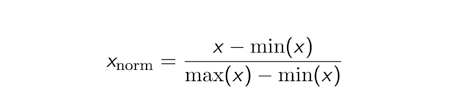

In [115]:
X_train.dtypes

INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
REG_FEE                    int64
COMMIS                     int64
AREA_Anna_Nagar            uint8
AREA_Chrompet              uint8
AREA_KK_Nagar              uint8
AREA_Karapakkam            uint8
AREA_T_Nagar               uint8
AREA_Velachery             uint8
SALE_COND_AbNormal         uint8
SALE_COND_Adj Land         uint8
SALE_COND_AdjLand          uint8
SALE_COND_Family           uint8
SALE_COND_Normal Sale      uint8
SALE_COND_Partial          uint8
PARK_FACIL_Noo             uint8
PARK_FACIL_Yes             uint8
BUILDTYPE_Commercial       uint8
BUILDTYPE_House            uint8
BUILDTYPE_Other            uint8
BUILDTYPE_Others           uint8
UTILITY_AVAIL_AllPub       uint8
UTILITY_AV

In [116]:
X_val.dtypes

INT_SQFT                   int64
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
REG_FEE                    int64
COMMIS                     int64
AREA_Anna_Nagar            uint8
AREA_Chrompet              uint8
AREA_KK_Nagar              uint8
AREA_Karapakkam            uint8
AREA_T_Nagar               uint8
AREA_Velachery             uint8
SALE_COND_AbNormal         uint8
SALE_COND_Adj Land         uint8
SALE_COND_AdjLand          uint8
SALE_COND_Family           uint8
SALE_COND_Normal Sale      uint8
SALE_COND_Partial          uint8
PARK_FACIL_Noo             uint8
PARK_FACIL_Yes             uint8
BUILDTYPE_Commercial       uint8
BUILDTYPE_House            uint8
BUILDTYPE_Other            uint8
BUILDTYPE_Others           uint8
UTILITY_AVAIL_AllPub       uint8
UTILITY_AV

In [117]:
X_train.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,AREA_Anna_Nagar,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_NoAccess,STREET_Pavd,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
1572,918,75,1.0,1.0,3,4.1,3.8,4.5,4.24,355555,9877,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3022,1609,60,2.0,2.0,4,2.8,3.5,3.0,3.09,428241,129770,0,...,0,0,0,0,0,0,1,0,0,0,0,1
1322,1559,139,2.0,1.0,4,5.0,3.9,2.3,3.59,655219,111527,0,...,0,1,0,0,0,0,0,0,0,0,0,1
4547,1047,148,1.0,1.0,3,4.0,2.0,3.1,3.04,332055,169560,0,...,0,1,0,1,0,0,0,0,0,0,0,0
3599,1467,127,2.0,2.0,4,2.6,3.0,2.0,2.48,234920,80217,0,...,1,0,0,1,0,0,0,0,0,0,0,0


In [118]:
X_val.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,AREA_Anna_Nagar,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_NoAccess,STREET_Pavd,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
1898,1146,121,1.0,1.0,3,3.1,2.5,2.5,2.68,414662,165865,0,...,0,1,0,1,0,0,0,0,0,0,1,0
2916,1793,140,2.0,1.0,4,4.5,4.7,2.3,3.93,237331,62823,0,...,0,0,1,1,0,0,0,0,0,0,0,0
4464,1057,33,1.0,1.0,3,3.3,3.2,4.7,3.68,235229,121670,0,...,0,0,0,1,0,0,0,0,0,1,0,0
2043,1096,116,1.0,1.0,3,2.6,4.8,2.6,3.26,278715,97226,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2151,770,131,1.0,1.0,2,2.7,5.0,2.0,3.11,261857,114962,0,...,0,0,1,0,0,0,1,1,0,0,0,0


In [119]:
categorical_columns = X_train.select_dtypes(
    include=['object']).columns.tolist()

categorical_columns


[]

In [120]:
categorical_columns = X_val.select_dtypes(
    include=['object']).columns.tolist()

categorical_columns


[]

In [121]:
for col in list(X_train.columns):
  maximo = X_train[col].max()
  minimo = X_train[col].min()

  X_train[col] = (X_train[col] - minimo) / (maximo - minimo)

  #Novamente, uso os dados de X_train para replicar no treino e validação
  X_test[col] = (X_test[col] - minimo) / (maximo - minimo)
  X_val[col] = (X_val[col] - minimo) / (maximo - minimo)

In [122]:
#Todos os dados estao entre 0 e 1
X_train.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,AREA_Anna_Nagar,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_NoAccess,STREET_Pavd,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.441694,0.495923,0.211778,0.209667,0.423250,0.505711,0.500567,0.492567,0.495185,0.339006,0.277561,0.116000,...,0.216333,0.260667,0.252333,0.284000,0.000667,0.001667,0.363000,0.079667,0.075667,0.257000,0.265000,0.246333
std,0.228987,0.287939,0.266089,0.407139,0.255494,0.296077,0.298309,0.292688,0.181226,0.160452,0.163059,0.320278,...,0.411813,0.439072,0.434424,0.451012,0.025816,0.040798,0.480945,0.270822,0.264508,0.437052,0.441407,0.430947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245623,0.250000,0.000000,0.000000,0.250000,0.266667,0.233333,0.233333,0.360825,0.220385,0.157075,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.445723,0.490000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.494845,0.308324,0.249760,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.624812,0.745000,0.333333,0.000000,0.500000,0.766667,0.766667,0.733333,0.629725,0.427832,0.370094,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
max_y = y_train.max()

In [124]:
min_y = y_train.min()

In [125]:
y_train = (y_train - min_y) / (max_y-min_y)
y_test = (y_test - min_y) / (max_y-min_y)
y_val = (y_val - min_y) / (max_y-min_y)

In [126]:
len(X_train.columns)

42

In [127]:
X_train.head(10)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,AREA_Anna_Nagar,...,UTILITY_AVAIL_ELO,UTILITY_AVAIL_NoSeWa,UTILITY_AVAIL_NoSewr,STREET_No Access,STREET_NoAccess,STREET_Pavd,STREET_Paved,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
1572,0.209105,0.375,0.000000,0.0,0.25,0.700000,0.600000,0.833333,0.749141,0.311563,0.009834,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3022,0.554777,0.300,0.333333,1.0,0.50,0.266667,0.500000,0.333333,0.353952,0.391198,0.254339,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1322,0.529765,0.695,0.333333,0.0,0.50,1.000000,0.633333,0.100000,0.525773,0.639874,0.217135,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4547,0.273637,0.740,0.000000,0.0,0.25,0.666667,0.000000,0.366667,0.336770,0.285817,0.335485,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3599,0.483742,0.635,0.333333,1.0,0.50,0.200000,0.333333,0.000000,0.144330,0.179396,0.153282,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2957,0.189595,0.095,0.000000,0.0,0.25,0.900000,0.066667,0.466667,0.429553,0.115291,0.133594,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4095,0.911456,0.200,1.000000,1.0,1.00,0.900000,0.266667,0.066667,0.367698,0.623698,0.533906,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3834,0.736868,0.245,0.333333,0.0,0.75,0.100000,0.366667,0.266667,0.219931,0.443234,0.138952,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
240,0.631316,0.565,0.000000,0.0,0.50,0.933333,0.033333,0.633333,0.585911,0.450820,0.126402,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3747,0.230615,0.305,0.000000,0.0,0.25,0.933333,0.966667,1.000000,0.975945,0.170693,0.229705,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Modelagem

### Parametros da Rede Neural

* Early Stopping

In [128]:
# Incluindo early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

* Learning Rate

In [44]:
# Definindo a função para agendar o learning rate
def lr_scheduler(epoch):
    if epoch < 50:
        return 0.005
    elif epoch < 100:
        return 0.001
    elif epoch < 150:
        return 0.0005
    else:
        return 0.0001

# Criando o callback para o Learning Rate Scheduler
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Optei por alterar o learning rate a cada 50 epocas,
# pois o early stop vai encerrar o treinamento quando 50 epocas se passarem sem melhorar o modelo.

Lembrete: esses parâmetros (early stopping e learning rate) são utilizados como callbacks:



```
# Treinando o modelo
model.fit(X_train, y_train, epochs=200, batch_size=16, callbacks=[lr_scheduler_callback,early_stopping_callback])
```



* Treinamento com Treino e Teste



```
# Treinando o modelo com os dados de treinamento e calculando a perda no conjunto de teste
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))

```



### Modelo 1

In [45]:
# Crie o modelo sequencial
model = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model.add(tf.keras.layers.Dense(1, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(delta=1.0))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5504      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8

In [47]:
history = model.fit(X_train.values, np.array(y_train), epochs=1000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )

Epoch 1/1000


2/2 [==============================] - 1s 151ms/step - loss: 0.5239 - val_loss: 0.0250 - lr: 0.0050
Epoch 2/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.0329 - val_loss: 0.0494 - lr: 0.0050
Epoch 3/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0502 - val_loss: 0.0150 - lr: 0.0050
Epoch 4/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.0205 - val_loss: 0.0204 - lr: 0.0050
Epoch 5/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.0195 - val_loss: 0.0155 - lr: 0.0050
Epoch 6/1000
2/2 [==============================] - 0s 35ms/step - loss: 0.0179 - val_loss: 0.0165 - lr: 0.0050
Epoch 7/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.0179 - val_loss: 0.0097 - lr: 0.0050
Epoch 8/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0108 - val_loss: 0.0142 - lr: 0.0050
Epoch 9/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.0141 - val_loss: 0.0079 - lr: 0.0050
Epoc

In [48]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss = history.history['loss']
test_loss = history.history['val_loss']

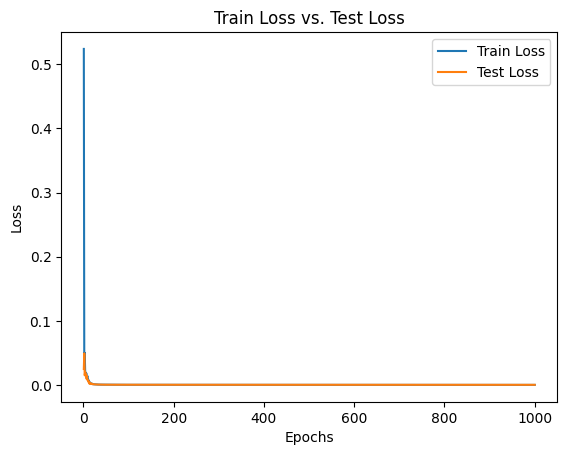

In [49]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

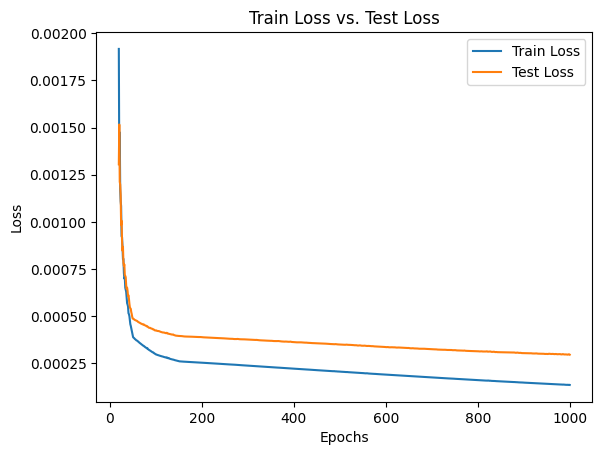

In [50]:
# Plotando o gráfico comparativo a partir da epoch 25
epochs = range(20, len(train_loss) + 1)
plt.plot(epochs, train_loss[19:], label='Train Loss')
plt.plot(epochs, test_loss[19:], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Modelo 2

In [51]:
# Crie o model2o sequencial
model2 = tf.keras.models.Sequential() #Definimos que é um model2o de rede neural sequencial

# Adicione a primeira camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model2.add(tf.keras.layers.Dense(1, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o model2o
model2.compile(optimizer='adam', loss='mean_squared_error')


In [52]:
history2 = model2.fit(X_train.values, np.array(y_train), epochs=1000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test)))

Epoch 1/1000
2/2 [==============================] - 0s 92ms/step - loss: 2.1732 - val_loss: 0.0283 - lr: 0.0050
Epoch 2/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.0486 - val_loss: 0.1257 - lr: 0.0050
Epoch 3/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.1295 - val_loss: 0.0554 - lr: 0.0050
Epoch 4/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.0560 - val_loss: 0.0916 - lr: 0.0050
Epoch 5/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.0793 - val_loss: 0.0271 - lr: 0.0050
Epoch 6/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0310 - val_loss: 0.0401 - lr: 0.0050
Epoch 7/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0448 - val_loss: 0.0368 - lr: 0.0050
Epoch 8/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0401 - val_loss: 0.0273 - lr: 0.0050
Epoch 9/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.0298 - val_loss: 0.0302 - lr:

In [53]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']

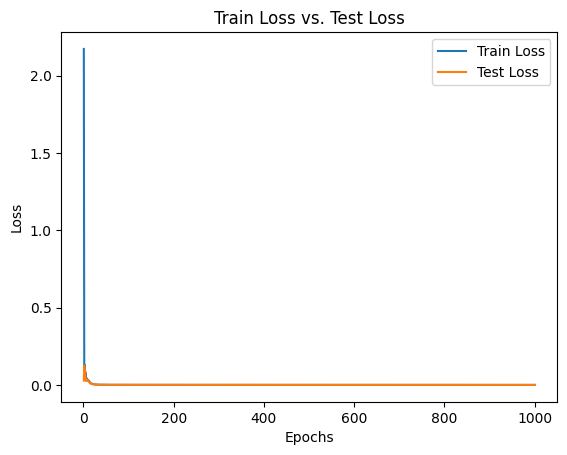

In [54]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss2) + 1)
plt.plot(epochs, train_loss2, label='Train Loss')
plt.plot(epochs, test_loss2, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

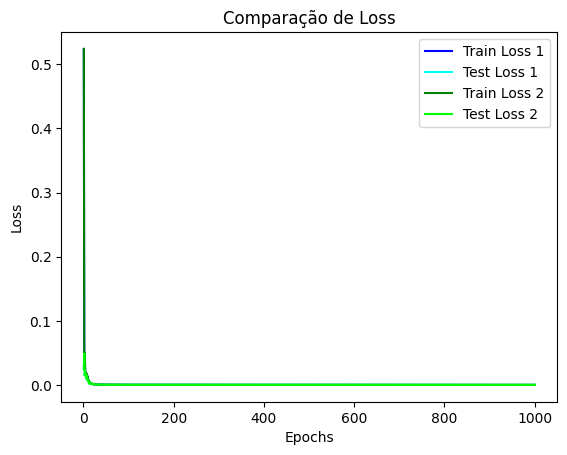

In [55]:
# Interpolação para ajustar as curvas de perda com a mesma quantidade de pontos
epochs1 = range(1, len(train_loss) + 1)
epochs2 = np.linspace(1, len(train_loss), len(train_loss2))
train_loss2_interp = np.interp(epochs2, epochs1, train_loss)
test_loss2_interp = np.interp(epochs2, epochs1, test_loss)

# Plotando o gráfico comparativo
plt.plot(epochs1, train_loss, label='Train Loss 1', color='blue')
plt.plot(epochs1, test_loss, label='Test Loss 1', color='cyan')
plt.plot(epochs2, train_loss2_interp, label='Train Loss 2', color='green')
plt.plot(epochs2, test_loss2_interp, label='Test Loss 2', color='lime')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparação de Loss')
plt.legend()
plt.show()

Neste exemplo, comparamos a mesma arquitetura de rede neural, alterando apenas a função de perda.

No modelo 1, a função de perda era Huber Loss. No modelo 2, RMSE.

Vale ressaltar, que os resultados dos modelos dependem da inicialização. Portanto, isso pode variar, dependendo da execução.

**Percebemos que, o modelo 1 apresentou um erro melhor.**

### Modelo 3 - Criado a partir de experimentação

In [56]:
# Crie o model3o sequencial
model3 = tf.keras.models.Sequential() #Definimos que é um model3o de rede neural sequencial

# Adicione a primeira camada oculta
model3.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(32, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model3.add(tf.keras.layers.Dense(1, activation='relu')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo3
model3.compile(optimizer='adam', loss='mean_squared_error')


In [57]:
history3 = model3.fit(X_train.values, np.array(y_train), epochs=1000, batch_size=int(0.50*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test)))

Epoch 1/1000
2/2 [==============================] - 0s 68ms/step - loss: 0.2013 - val_loss: 0.1913 - lr: 0.0050
Epoch 2/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2013 - val_loss: 0.1913 - lr: 0.0050
Epoch 3/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2013 - val_loss: 0.1913 - lr: 0.0050
Epoch 4/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2013 - val_loss: 0.1913 - lr: 0.0050
Epoch 5/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2013 - val_loss: 0.1913 - lr: 0.0050
Epoch 6/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2013 - val_loss: 0.1913 - lr: 0.0050
Epoch 7/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2013 - val_loss: 0.1913 - lr: 0.0050
Epoch 8/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2013 - val_loss: 0.1913 - lr: 0.0050
Epoch 9/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2013 - val_loss: 0.1913 - lr:

In [58]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss3 = history3.history['loss']
test_loss3 = history3.history['val_loss']

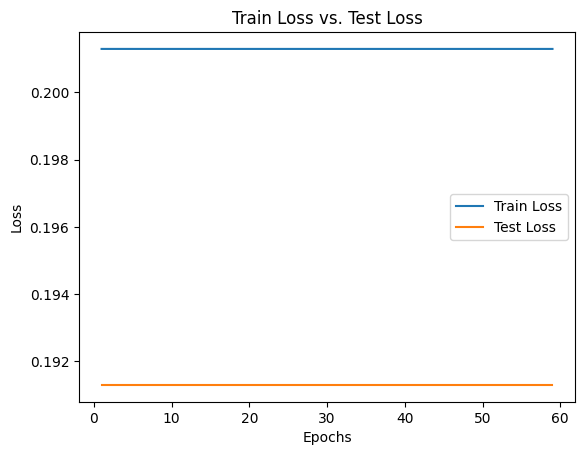

In [69]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss3) + 1)
plt.plot(epochs, train_loss3, label='Train Loss')
plt.plot(epochs, test_loss3, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

In [70]:
# # Interpolação para ajustar as curvas de perda com a mesma quantidade de pontos
# epochs1 = range(1, len(train_loss) + 1)
# epochs2 = np.linspace(1, len(train_loss), len(train_loss2))
# epochs3 = np.linspace(1, len(train_loss2), len(train_loss3))

# train_loss2_interp = np.interp(epochs2, epochs1, train_loss)
# test_loss2_interp = np.interp(epochs2, epochs1, test_loss)

# train_loss3_interp = np.interp(epochs3, epochs2, train_loss3)
# test_loss3_interp = np.interp(epochs3, epochs2, test_loss3)

# # Plotando o gráfico comparativo
# plt.plot(epochs1, train_loss, label='Train Loss 1', color='blue')
# plt.plot(epochs1, test_loss, label='Test Loss 1', color='cyan')
# plt.plot(epochs2, train_loss2_interp, label='Train Loss 2', color='green')
# plt.plot(epochs2, test_loss2_interp, label='Test Loss 2', color='lime')
# plt.plot(epochs3, train_loss3_interp, label='Train Loss 3', color='green')
# plt.plot(epochs3, test_loss3_interp, label='Test Loss 3', color='lime')
# plt.plot()
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Comparação de Loss')
# plt.legend()
# plt.show()

Neste exemplo, comparamos a mesma arquitetura de rede neural, alterando apenas a função de perda.

No modelo 1, a função de perda era Huber Loss. No modelo 2, RMSE.

Vale ressaltar, que os resultados dos modelos dependem da inicialização. Portanto, isso pode variar, dependendo da execução.

**Percebemos que, o modelo 1 apresentou um erro melhor.**

### Teste Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
# Criar e treinar o modelo de Random Forest
model_rf = RandomForestRegressor(min_samples_leaf=int(len(X_train)*0.05),random_state=2023,n_estimators=250)
# n_estimators = Qt de arvores;
# min_samples_leaf = qt de dados necessario em cada folha
# random_state = semente

In [73]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=150, n_estimators=250, random_state=2023)

### Comparando os modelos

In [74]:
# Avaliar o modelo 1 (funcao de perda Huber) no conjunto de validação
val_predictions1 = model.predict(X_val)

25/25 [==============================] - 0s 979us/step


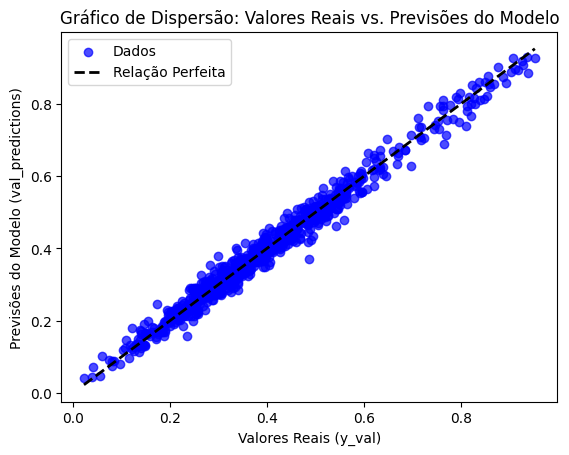

In [75]:
# Criar o gráfico de dispersão
plt.scatter(y_val, val_predictions1, alpha=0.7, c='b', label='Dados')

# Adicionar linha de referência (y = x) para mostrar a relação perfeita entre previsões e rótulos
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2, label='Relação Perfeita')

# Definir os rótulos dos eixos
plt.xlabel('Valores Reais (y_val)')
plt.ylabel('Previsões do Modelo (val_predictions)')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões do Modelo')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()

In [76]:
# Avaliar o modelo 2 (funcao de perda RMSE) no conjunto de validação
val_predictions2 = model2.predict(X_val)

25/25 [==============================] - 0s 1ms/step


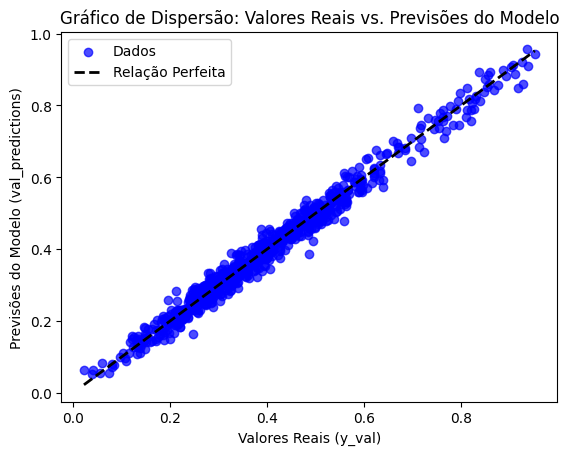

In [77]:
# Criar o gráfico de dispersão
plt.scatter(y_val, val_predictions2, alpha=0.7, c='b', label='Dados')

# Adicionar linha de referência (y = x) para mostrar a relação perfeita entre previsões e rótulos
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2, label='Relação Perfeita')

# Definir os rótulos dos eixos
plt.xlabel('Valores Reais (y_val)')
plt.ylabel('Previsões do Modelo (val_predictions)')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões do Modelo')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()

In [78]:
# Avaliar o modelo 2 (funcao de perda RMSE) no conjunto de validação
val_predictions3 = model3.predict(X_val)


25/25 [==============================] - 0s 465us/step


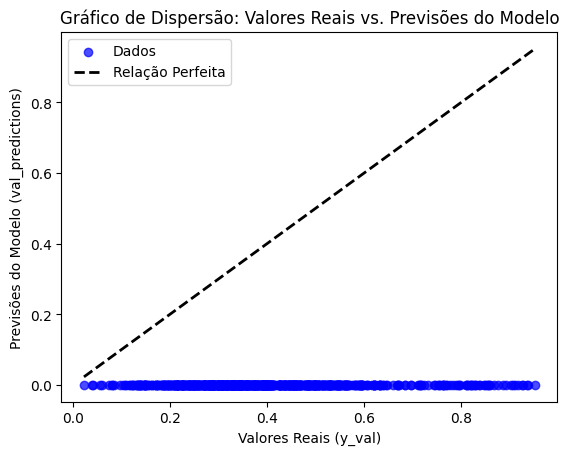

In [79]:
# Criar o gráfico de dispersão
plt.scatter(y_val, val_predictions3, alpha=0.7, c='b', label='Dados')

# Adicionar linha de referência (y = x) para mostrar a relação perfeita entre previsões e rótulos
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)],
         'k--', lw=2, label='Relação Perfeita')

# Definir os rótulos dos eixos
plt.xlabel('Valores Reais (y_val)')
plt.ylabel('Previsões do Modelo (val_predictions)')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões do Modelo')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()


In [80]:
# Avaliar o modelo de Random Forest no conjunto de validação
val_predictionsrf = model_rf.predict(X_val)

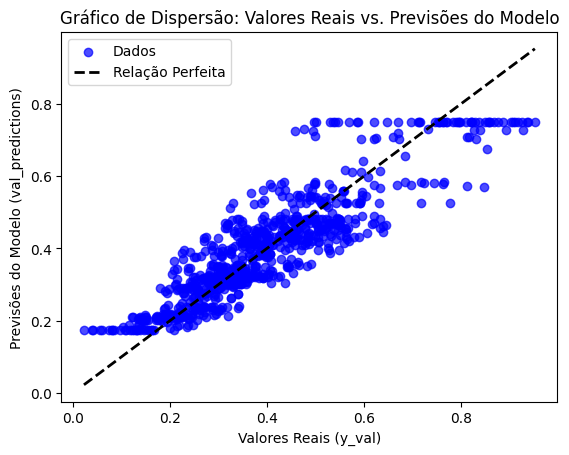

In [81]:
# Criar o gráfico de dispersão
plt.scatter(y_val, val_predictionsrf, alpha=0.7, c='b', label='Dados')

# Adicionar linha de referência (y = x) para mostrar a relação perfeita entre previsões e rótulos
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'k--', lw=2, label='Relação Perfeita')

# Definir os rótulos dos eixos
plt.xlabel('Valores Reais (y_val)')
plt.ylabel('Previsões do Modelo (val_predictions)')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões do Modelo')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error

print(f'Modelo Redes Neurais RMSE: {mean_squared_error(y_val, val_predictions1, squared=False):.4f}')
print(f'Modelo Redes Neurais Huber: {mean_squared_error(y_val, val_predictions2, squared=False):.4f}')
print(f'Modelo RF: {mean_squared_error(y_val, val_predictionsrf, squared=False):.4f}')

Modelo Redes Neurais RMSE: 0.0240
Modelo Redes Neurais Huber: 0.0236
Modelo RF: 0.0781


* Nesse teste, a rede neural com a função de perda Huber Loss obteve um erro menor que os demais modelos.

* O modelo Random Forest teve um erro menor que a Rede Neural com a função de erro RMSE.

O ranking dos modelo ficou, como:
1. Rede Neural Huber Loss: RMSE 0.0690;
2. Random Forest: RMSE 0.0806
3. Rede Neural RMSE: RMSE 0.0891.

# Atividade

A base '05_df_treino_teste.csv' envolve características de imóveis e o preço de venda desses respectivos imóveis. Nessa base contém um conjunto variáveis explicativas. **Algumas dessas variáveis** são geradas após a venda do imóvel. Por esse motivo, na base '05_validacao.csv', constam menos colunas.

Da atividade:
1. Tratamento de dados: tratamento de missing, conversão de variável categórica para numérica e criação de novas variáveis;
2. Teste diferentes arquiteturas de redes neurais, utilizando a base '05_df_treino_teste.csv'. Não esqueça de dividir entre treino e teste.
3. Faça a predição na base '05_validacao.csv'. Cada grupo poderá enviar até 3 colunas de predição. É obrigatório enviar a coluna PRT_ID e as três colunas de predição.

Lembrem-se que a coluna **PRT_ID** não é uma variável explicativa.

In [83]:
len(X_val)

800

In [129]:
# # Separando o Atributo de Identificação do Banco de Dados.
# ID = X_val['PRT_ID']

# # Removendo o Atributo ID Do Banco de Dados.
# X_val = X_val.drop(columns=['PRT_ID'])

#Criando o DataFrame que Irá Armazenar os Resultados
result = pd.DataFrame(index=ID)

In [130]:
y_pred = model.predict(np.array(X_val)).flatten()

result['Model_1'] = y_pred


25/25 [==============================] - 0s 1ms/step


In [131]:
y_pred = model2.predict(np.array(X_val)).flatten()

result['Model_2'] = y_pred

25/25 [==============================] - 0s 1ms/step


In [132]:
y_pred = model3.predict(np.array(X_val)).flatten()

result['Model_3'] = y_pred

25/25 [==============================] - 0s 367us/step


In [133]:
result_export = result[['Model_1', 'Model_2', 'Model_3']]

result_export.to_csv('./resultados/base_ac2.csv')